<a href="https://colab.research.google.com/github/StephanieNhiLe/QuakeSense/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
# from termcolor import colored
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# df = pd.read_csv('data/raw/earthquakes_1995_2023.csv')
df = pd.read_csv('data/raw/earthquakes_1995_2024.csv')
print(df.columns)
data = df.copy()
# data = data.dropna(subset=['Total Deaths'])
if 'Total Deaths' in data.columns:
    data = data.dropna(subset=['Total Deaths'])
else:
    print("Column 'Total Deaths' does not exist in the DataFrame.")

Index(['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Location Name',
       'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'MMI Int', 'Deaths',
       'Death Description', 'Missing', 'Missing Description', 'Injuries',
       'Injuries Description', 'Damage ($Mil)', 'Damage Description',
       'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')


# Visualizing Earthquake Distribution over West Coast of the United States
### Using Database from NOAA - 'earthquakes_1995_2024'

In [29]:
def make_world_fig(data, lat, lon, hover_name, size, cl_disc_seq, zoom, height):
    # data_us = data[data['country'] == 'United States of America']
    fig = px.scatter_mapbox(data, lat=lat, lon=lon,
        hover_name=hover_name,
        size=size,
        color_discrete_sequence=cl_disc_seq,
        zoom=zoom, height=height
    )

    fig.update_layout(
        margin={"r":0,"t":0,"l":0,"b":0},
        mapbox_style="white-bg",
        mapbox_layers=[{
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
        ]}]
    )
    # print(data_us)

    return fig

Visualizing Earthquake Location and Magnitude

In [30]:
# Creating visually differentiable values
# Diminishing the difference, to avoid vanishing points in map
data['Power'] = pow(10, data['Mag']) / pow(3, data['Mag'])
data['Power'] = data['Power'].round(0)
# data_us = data[data['country'] == 'United States of America']
fig = make_world_fig(data, 'Latitude', 'Longitude', 'Mag', 'Power', ["red"], 1.5, 500)
fig.show()
print(data)

     Year  Mo  Dy  Hr  Mn   Sec     Tsu  Vol  \
0    1995   9  14  14   4  31.4  2251.0  NaN   
2    1995  10   9  15  35  53.9  2252.0  NaN   
6    1997   1  11  20  28  26.0     NaN  NaN   
8    1999   6  15  20  42   5.9     NaN  NaN   
10   1999   9  30  16  31  15.6     NaN  NaN   
13   2001   2  28  18  54  32.8     NaN  NaN   
22   2003   1  22   2   6  34.6  2402.0  NaN   
27   2003  12  22  19  15  56.0     NaN  NaN   
38   2007   8   6   8  48  40.0     NaN  NaN   
39   2007   8  17   0  38  56.0     NaN  NaN   
48   2010   4   4  22  40  43.1     NaN  NaN   
51   2010   6  30   7  22  27.6     NaN  NaN   
60   2011  12  11   1  47  25.9     NaN  NaN   
61   2012   3  20  18   2  47.4  5447.0  NaN   
62   2012  10  28   3   4   8.9  5467.0  NaN   
64   2013   4  18   0  50  38.5     NaN  NaN   
72   2014   7   7  11  23  54.8     NaN  NaN   
75   2014   7  29  10  46  14.7     NaN  NaN   
76   2014   8  24  10  20  44.1     NaN  NaN   
78   2015  12  17  19  49  53.1     NaN 

# Visualizing Earthquake Location and Impact
### Using Database from Kaggle - 'earthquake_1995-2023'

Only applicable for "earthquakes_1995_2023" database

In [27]:
# Only run if using earthquakes_1995_2023 database, it has 'sig' field
# data_us = data[data['country'] == 'US']

data['sig'] = data['sig'] ** 2 / 10_000 # Creating visually differentiable values for sig
data['sig'] = data['sig'].round(0)

fig = make_world_fig(data_us, 'latitude', 'longitude', 'magnitude', 'sig', ["red"], 1.5, 500)
fig.show()

# Linear Regression
### Using Database from Kaggle - 'earthquake_1995-2023'


In [32]:
# Only run if using earthquake_1995-2023 database, it has 'depth' field
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['depth', 'latitude']]
y = data['magnitude']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.19533861528249669
Coefficients: [5.12704771e-05 6.76474674e-06]
Intercept: 6.934974064242581


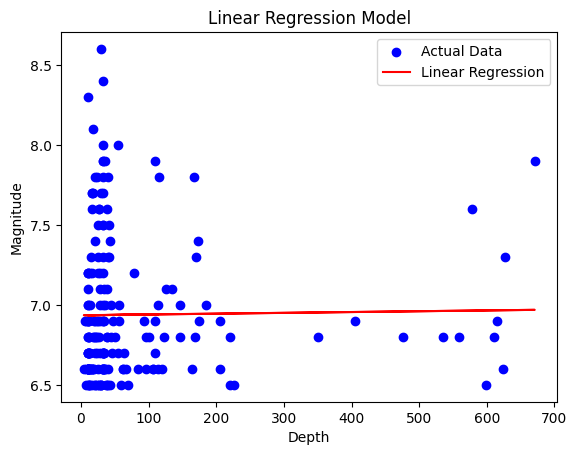

In [33]:
import matplotlib.pyplot as plt

# Actual data points
plt.scatter(X_test['depth'], y_test, color='blue', label='Actual Data')

# Linear regression line
plt.plot(X_test['depth'], y_pred, color='red', label='Linear Regression')

plt.title('Linear Regression Model')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


Interpretation: negative correlation -> as the depth increases, the magnitude decreases -> magnitude does not perfectly follow a linear relationship with depth

# Logistic Regression
### Using Database from Kaggle - 'earthquake_1995-2023'

Accuracy: 0.67


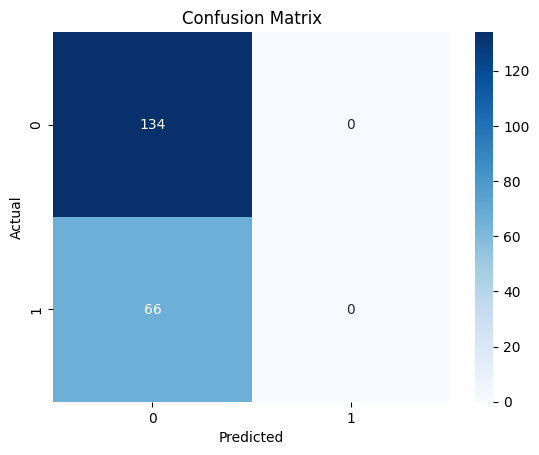

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

X = data[['depth', 'latitude']]
# 'earthquake' data doesn't exist so use 'tsunami' instead
y = data['tsunami']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


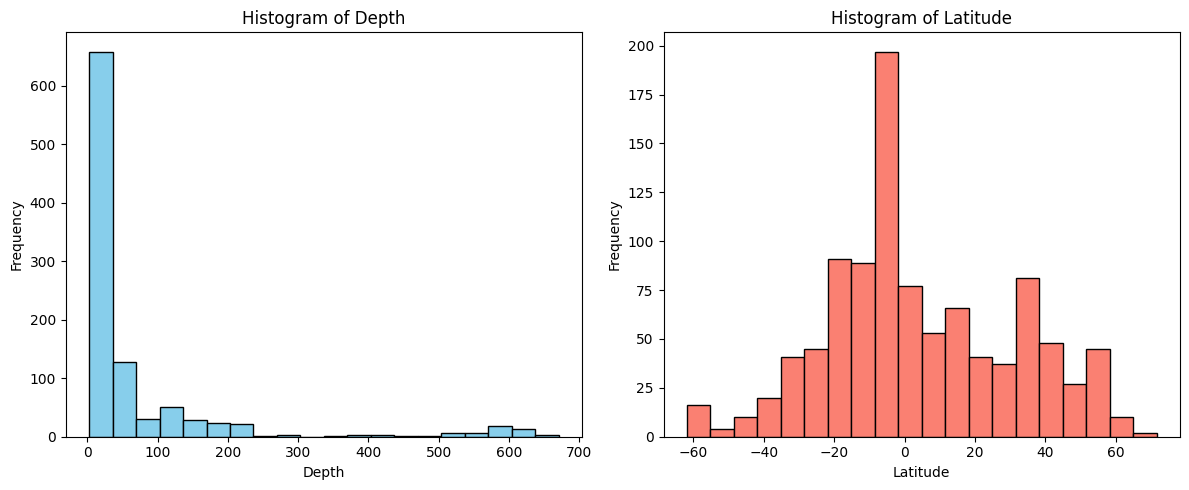

In [36]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['depth'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Histogram of Depth')

plt.subplot(1, 2, 2)
plt.hist(data['latitude'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')

plt.tight_layout()
plt.show()


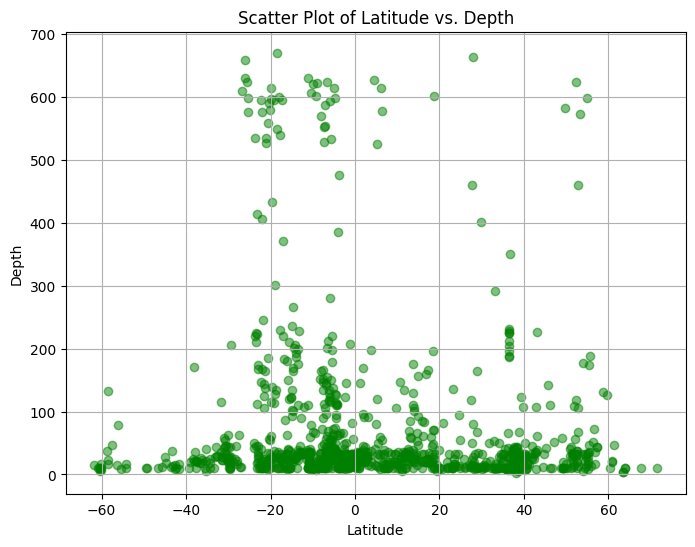

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(data['latitude'], data['depth'], color='green', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.title('Scatter Plot of Latitude vs. Depth')
plt.grid(True)
plt.show()


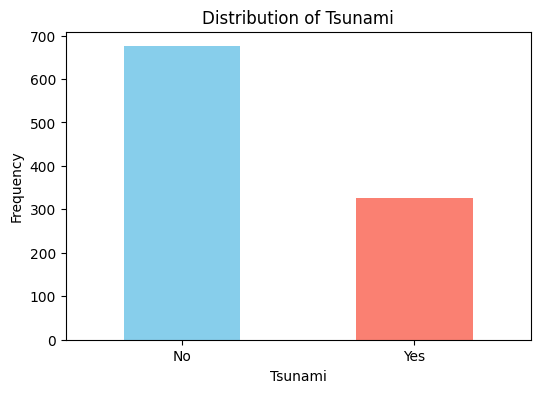

In [38]:
plt.figure(figsize=(6, 4))
tsunami_counts = data['tsunami'].value_counts()
tsunami_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Tsunami')
plt.ylabel('Frequency')
plt.title('Distribution of Tsunami')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


# Logistic Regression
### Using Database from NOAA - 'earthquakes_1995_2024'

In [40]:
# Data Processing
from sklearn.preprocessing import StandardScaler

X = data[['Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Latitude', 'Longitude']]
y = data['Total Deaths']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
# Model Training
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.14285714285714285
              precision    recall  f1-score   support

         1.0       0.17      1.00      0.29         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         2

    accuracy                           0.14         7
   macro avg       0.03      0.20      0.06         7
weighted avg       0.02      0.14      0.04         7



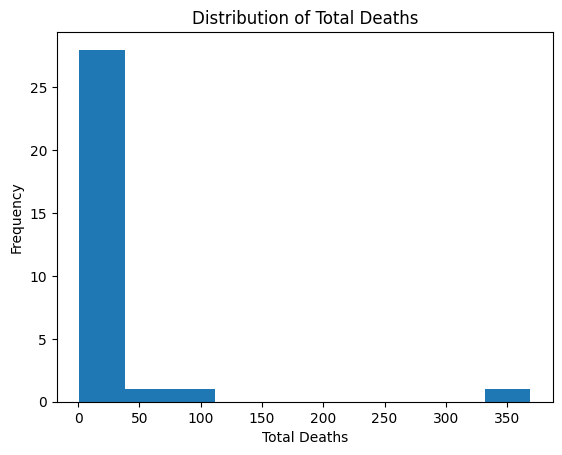

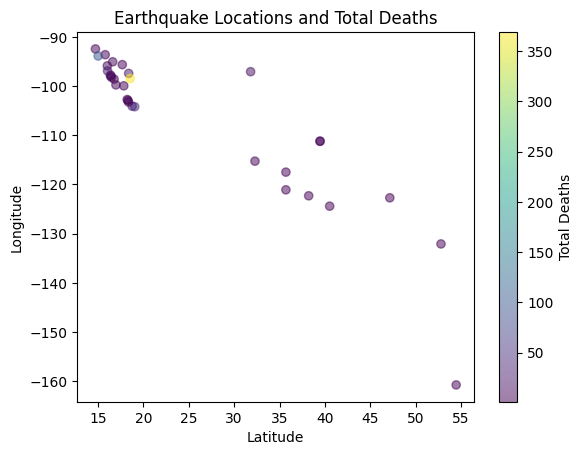

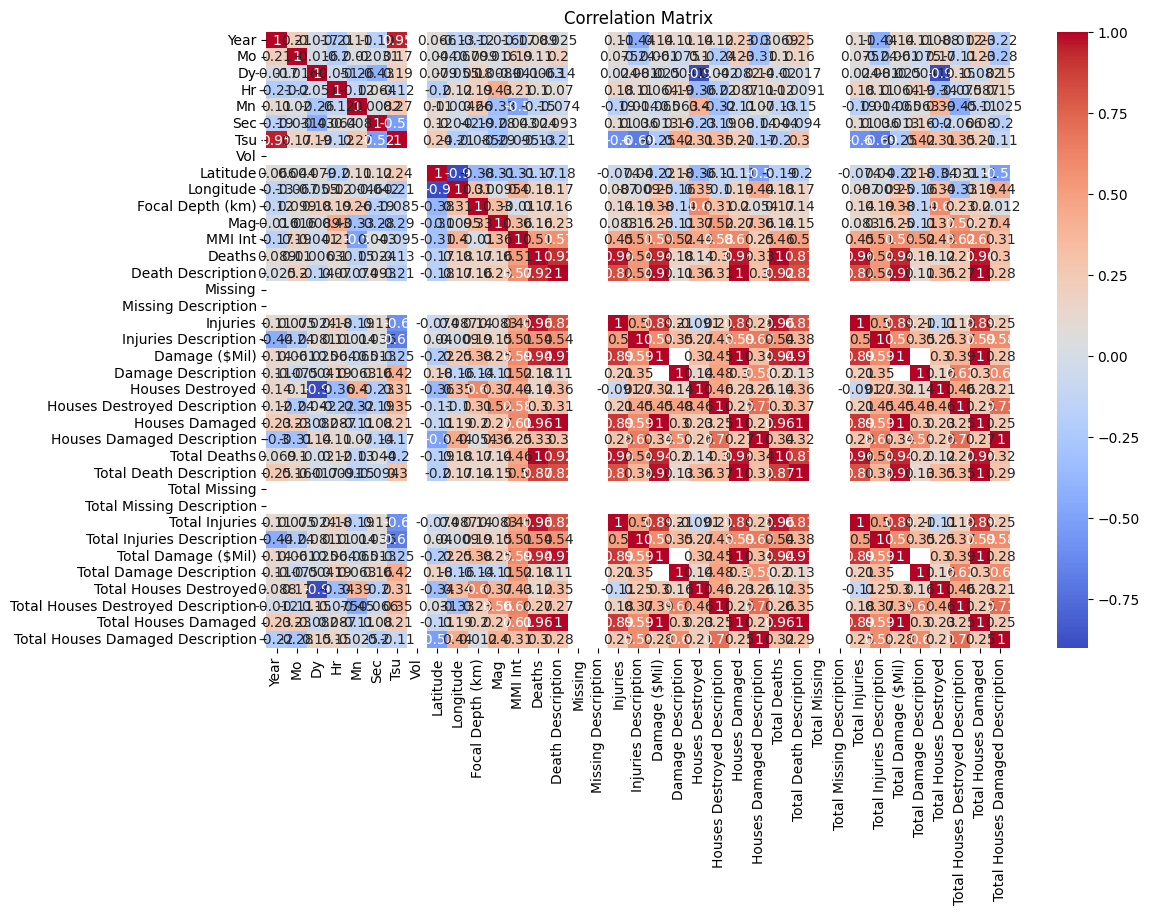

In [43]:
# Data Visualization
import matplotlib.pyplot as plt

# Total Deaths distribution
plt.hist(data['Total Deaths'], bins=10)
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.title('Distribution of Total Deaths')
plt.show()

# Latitude and Longitude with Total Deaths
plt.scatter(data['Latitude'], data['Longitude'], c=data['Total Deaths'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Total Deaths')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Earthquake Locations and Total Deaths')
plt.show()

# Correlation matrix
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the data into a pandas DataFrame
data = pd.read_csv('data/raw/earthquakes_1995_2024.csv')

# Preprocess the data
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
data['Location Name'] = label_encoder.fit_transform(data['Location Name'])

# Drop unnecessary columns
data = data.drop(['Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Deaths', 'Death Description', 'Missing', 'Missing Description', 'Injuries', 'Injuries Description', 'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged', 'Houses Damaged Description', 'Total Deaths', 'Total Death Description', 'Total Missing', 'Total Missing Description', 'Total Injuries', 'Total Injuries Description', 'Total Houses Destroyed', 'Total Houses Destroyed Description', 'Total Houses Damaged', 'Total Houses Damaged Description'], axis=1)

# Define the target variable
Y = data['Damage ($Mil)']

# Drop the target variable from the features
X = data.drop('Damage ($Mil)', axis=1)

# Drop rows with missing values in both X and Y
# combined = pd.concat([X, Y], axis=1).dropna()
# X = combined.drop('Damage ($Mil)', axis=1)
# Y = combined['Damage ($Mil)']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, Y_test)
print(f'Accuracy: {accuracy}')

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Train Model

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
data = pd.read_csv('data/raw/earthquakes_1995_2024.csv')

# Step 2: Data Preprocessing
# Define a function to convert damage description into a binary variable
def damage_binary(row):
    if row['Damage ($Mil)'] > 0 or pd.notna(row['Damage Description']):
        return 1
    else:
        return 0

# Apply the function to create the target variable
data['Damage'] = data.apply(damage_binary, axis=1)

# Select relevant features and target variable
features = ['Mag', 'Focal Depth (km)', 'Latitude', 'Longitude', 'Tsu']
target = 'Damage'

# Handle missing values
data = data.dropna(subset=features)

# Convert 'Tsu' to a binary variable (0 if no tsunami, 1 if tsunami)
data['Tsu'] = data['Tsu'].apply(lambda x: 1 if pd.notna(x) else 0)

X = data[features]
Y = data[target]

# Step 3: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Step 5: Make predictions and evaluate the model
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.33      0.50         3

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('earthquakes_1995_2024.csv')

# Data Preprocessing
# Define a function to convert damage description into a binary variable
def damage_binary(row):
    if row['Damage ($Mil)'] > 0 or pd.notna(row['Damage Description']):
        return 1
    else:
        return 0

# Apply the function to create the target variable
data['Damage'] = data.apply(damage_binary, axis=1)

features = ['Mag', 'Focal Depth (km)', 'Latitude', 'Longitude', 'Tsu']
target = 'Damage'

# Handle missing values
data = data.dropna(subset=features)

# Convert 'Tsu' to a binary variable (0 if no tsunami, 1 if tsunami)
data['Tsu'] = data['Tsu'].apply(lambda x: 1 if pd.notna(x) else 0)

# Create a new feature: Magnitude * Focal Depth (potential energy release)
data['Mag_Focal_Depth'] = data['Mag'] * data['Focal Depth (km)']

# Create interaction terms between magnitude and geographical features
data['Mag_Latitude'] = data['Mag'] * data['Latitude']
data['Mag_Longitude'] = data['Mag'] * data['Longitude']

X = data[features + ['Mag_Focal_Depth', 'Mag_Latitude', 'Mag_Longitude']]
Y = data[target]

# Step 3: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Step 5: Make predictions and evaluate the model
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5714285714285714
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.50      0.33      0.40         3

    accuracy                           0.57         7
   macro avg       0.55      0.54      0.53         7
weighted avg       0.56      0.57      0.55         7



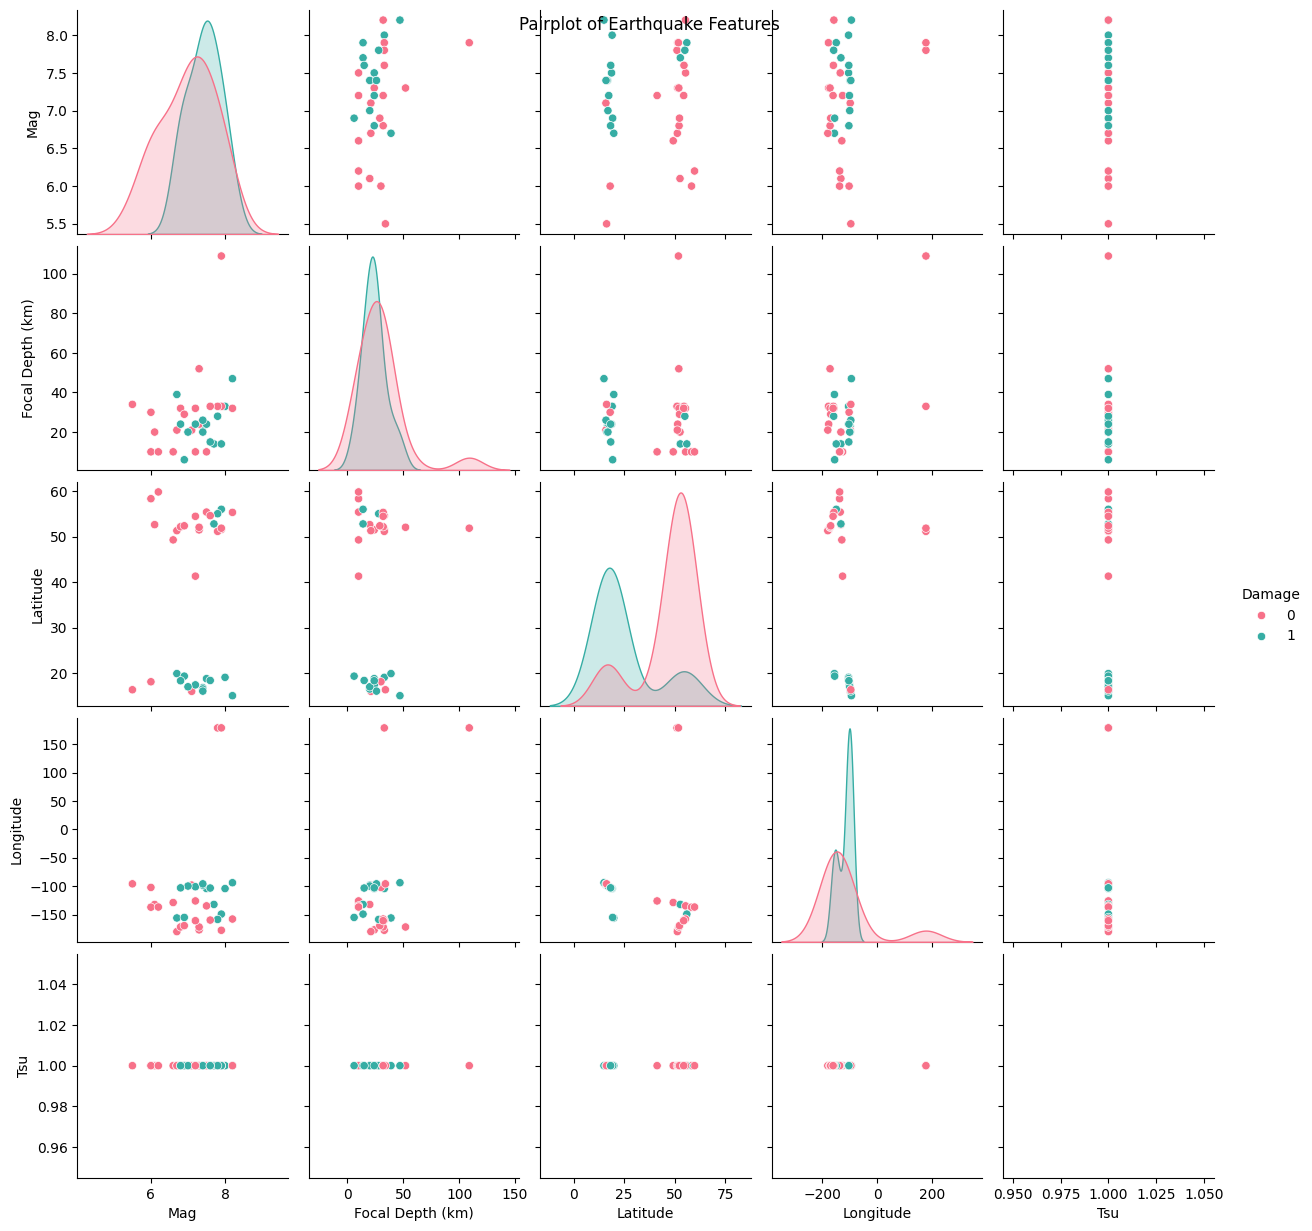

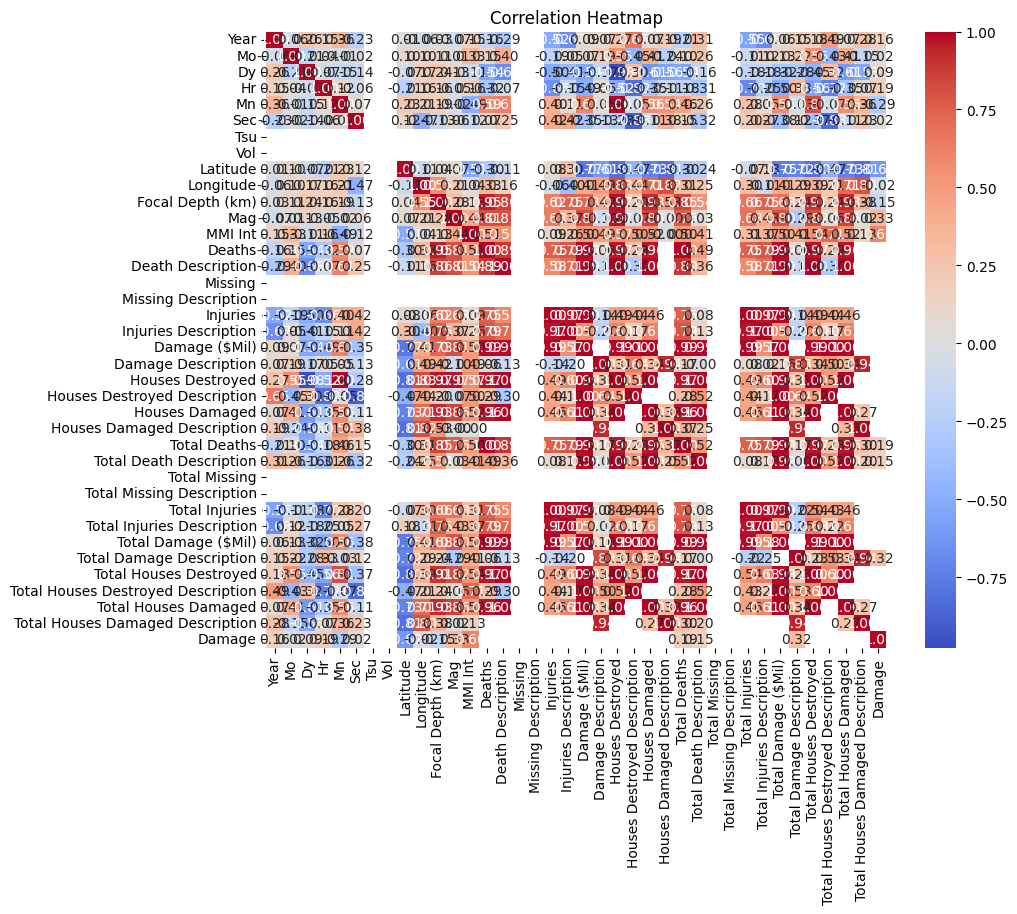

In [ ]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot to visualize relationships between different features
sns.pairplot(data, vars=features, hue='Damage', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Earthquake Features')
plt.show()

# Correlation heatmap to see the correlation between features
plt.figure(figsize=(10, 8))
# Select only numeric columns for the correlation matrix
numeric_cols = data.select_dtypes(include=[np.number]).columns
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

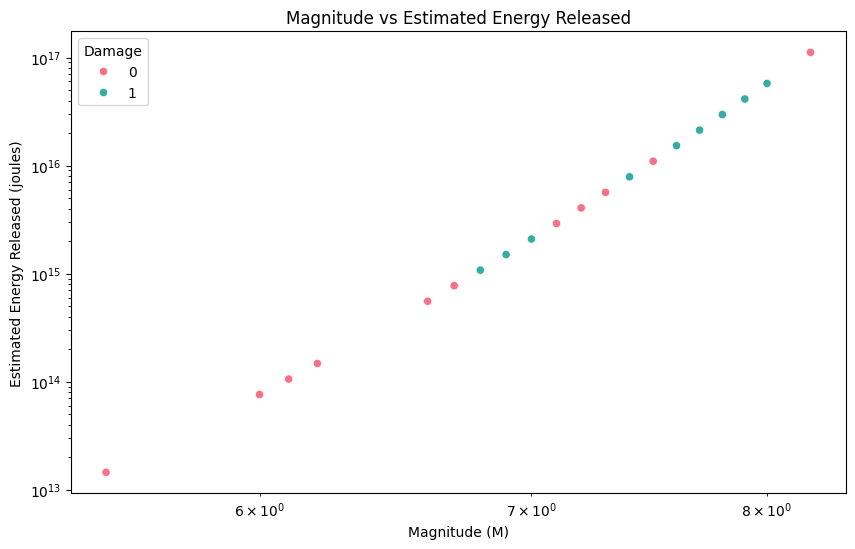

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter earthquakes with magnitude greater than 5
data = data[data['Mag'] > 5]

# Estimate energy released using the provided equation
data['Estimated_Energy'] = np.power(10, 5.24 + 1.44 * data['Mag'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Step 3: Visualization
# Scatter plot to visualize the relationship between magnitude and estimated energy released
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mag', y='Estimated_Energy', data=data, hue='Damage', palette='husl')
plt.title('Magnitude vs Estimated Energy Released')
plt.xlabel('Magnitude (M)')
plt.ylabel('Estimated Energy Released (joules)')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Correlation heatmap to see the correlation between numeric features
# plt.figure(figsize=(10, 8))
# sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()
